In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv(r'C:\Users\kisek\OneDrive\Desktop\job hunting\Datacamp certification\product_sales.csv')
df.head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [48]:
df.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

In [49]:
df.week.unique()

array([2, 6, 5, 4, 3, 1], dtype=int64)

In [50]:
df.sales_method.unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [51]:
df['sales_method'] = df['sales_method'].replace('em + call','Email + Call')
df['sales_method'] = df['sales_method'].replace('email','Email')
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [52]:
df['customer_id'].isnull().any()

False

In [53]:
df['customer_id'].duplicated().any()

False

In [54]:
df.customer_id.nunique()

15000

In [55]:
df.nb_sold.unique()

array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16], dtype=int64)

In [56]:
df['revenue'].isnull().any()

True

In [57]:
df['revenue'].isnull().sum()

1074

In [58]:
df = df.dropna(subset=['revenue'] )

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [60]:
negative = df['revenue'] <= 0
negative.unique()

array([False])

In [61]:
not_two_decimal = df[df['revenue'].astype(str).str.match(r'\d+\.\d{2}$') == False]
not_two_decimal['revenue'].count()

1416

In [62]:
df['revenue'] = df['revenue'].round(2)

In [63]:
df.years_as_customer.nunique()

42

In [64]:
df.years_as_customer.unique()

array([ 1,  6,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36,  3, 15, 14, 19,
       13, 12, 11, 30, 22, 18, 23, 32, 16, 39, 25, 33, 21, 31, 24, 27, 34,
       28, 26, 29, 35, 38, 37, 63, 47], dtype=int64)

In [65]:
df['years_as_customer'].isnull().any()

False

In [66]:
(df['years_as_customer'] > 39).sum()

2

In [67]:
df = df.loc[df['years_as_customer'] <= 39]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13924 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13924 non-null  int64  
 1   sales_method       13924 non-null  object 
 2   customer_id        13924 non-null  object 
 3   nb_sold            13924 non-null  int64  
 4   revenue            13924 non-null  float64
 5   years_as_customer  13924 non-null  int64  
 6   nb_site_visits     13924 non-null  int64  
 7   state              13924 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.0+ KB


In [69]:
df['nb_site_visits'].isnull().any()

False

In [70]:
df.nb_site_visits.nunique()

26

In [71]:
df.nb_site_visits.unique()

array([28, 26, 24, 22, 31, 23, 30, 25, 21, 27, 29, 20, 18, 19, 35, 32, 16,
       17, 33, 34, 15, 37, 36, 14, 13, 12], dtype=int64)

In [72]:
df.state.nunique()

50

In [73]:
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
             'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
             'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
             'West Virginia', 'Wisconsin', 'Wyoming']

len(us_states)

50

In [74]:
invalid_states = df[~df['state'].isin(us_states)]

# Print the invalid state names, if any
if not invalid_states.empty:
    print("Invalid state names found:")
    print(invalid_states)
else:
    print("No invalid state names found.")

No invalid state names found.


In [ ]:
invalid_states = ~df['state'].isin(us_states)

# Print the invalid state names, if any
if invalid_states:
    print("Invalid state names found:")
    print(invalid_states)
else:
    print("No invalid state names found.")

In [75]:
df.head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri
10,3,Email,c40f2602-8a7c-429e-bf13-cb1ec9e5f92f,9,89.49,4,28,Texas
11,2,Call,c20ab049-cbac-4ba7-8868-310aa89e0549,9,45.42,2,23,New York


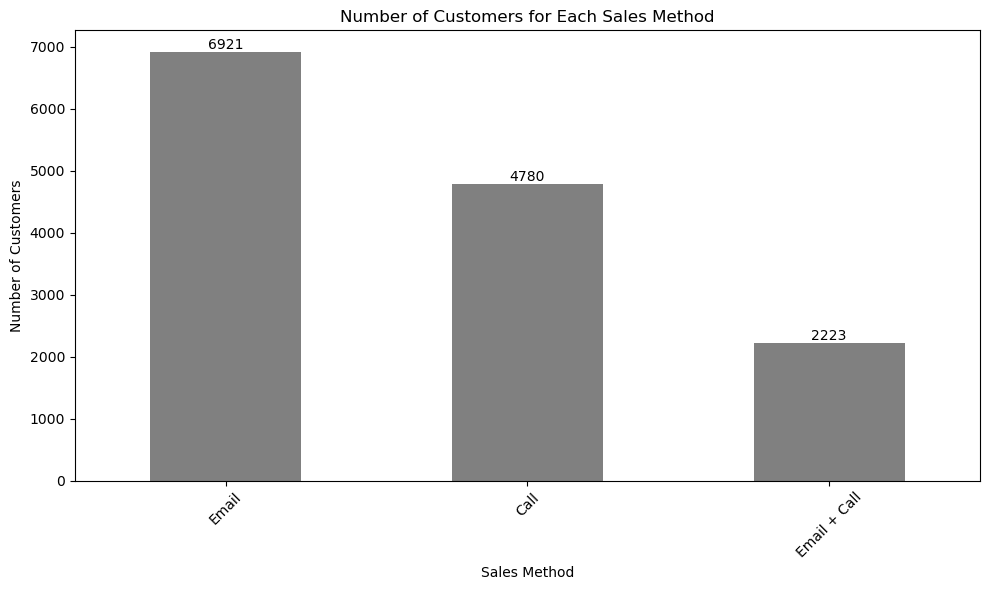

In [76]:
sales_method_counts = df['sales_method'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sales_method_counts.plot(kind='bar', color='gray')
plt.title('Number of Customers for Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the bars with the exact number of customers
for i, v in enumerate(sales_method_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()  # Ensure labels fit in the figure
plt.savefig('Number of Customers for Each Sales Method')
plt.show()

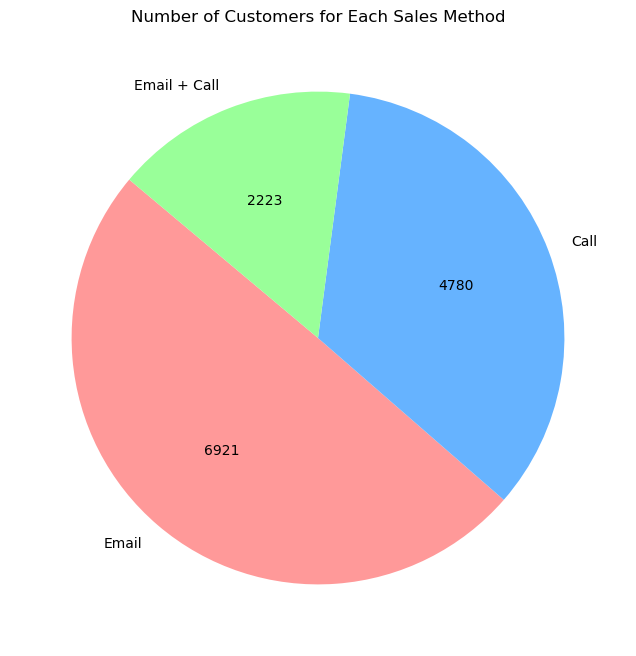

In [77]:
sales_method_counts = df['sales_method'].value_counts()

# Create a pie chart with annotations
plt.figure(figsize=(8, 8))
_, texts, autotexts = plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

# Add the exact numbers as annotations
for text, autotext, count in zip(texts, autotexts, sales_method_counts):
    autotext.set_text(str(count))

plt.title('Number of Customers for Each Sales Method')

plt.savefig('Number of Customers for Each Sales Method (Pie Chart)')
plt.show()

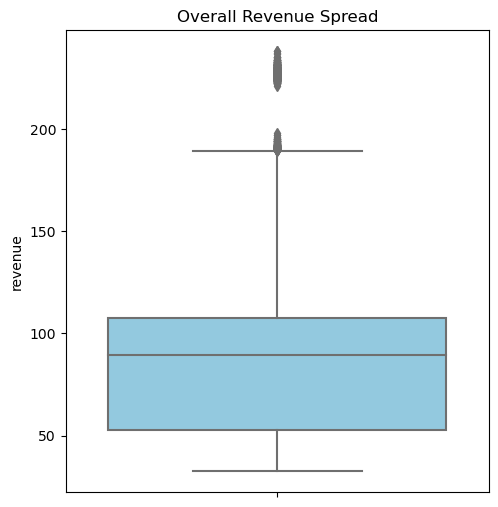

In [78]:
plt.figure(figsize=(12, 6))

# Overall revenue spread
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='revenue', color='skyblue')
plt.title('Overall Revenue Spread')
plt.savefig('Overall Revenue Spread')

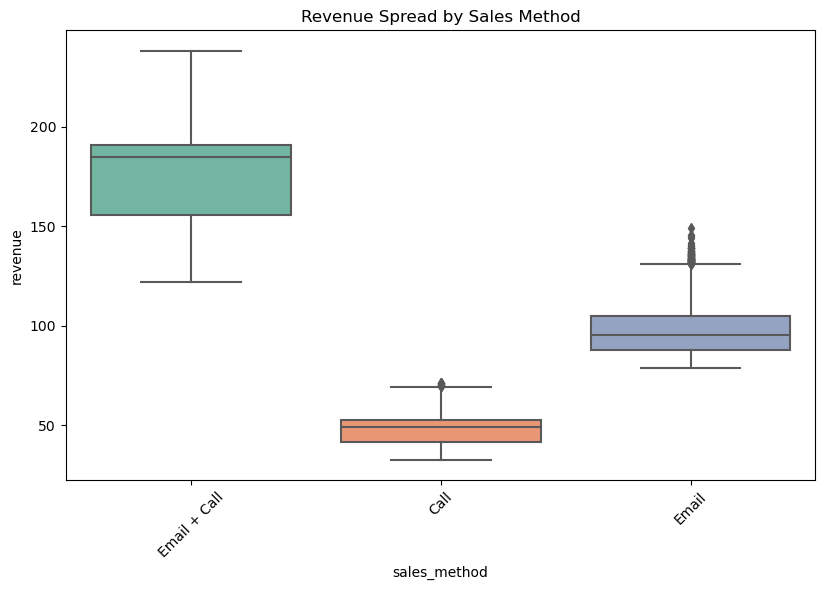

In [79]:
plt.figure(figsize=(16, 6))

# Revenue spread for each sales method
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='sales_method', y='revenue', palette='Set2')
plt.title('Revenue Spread by Sales Method')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('Revenue Spread by Sales Method')
plt.show()

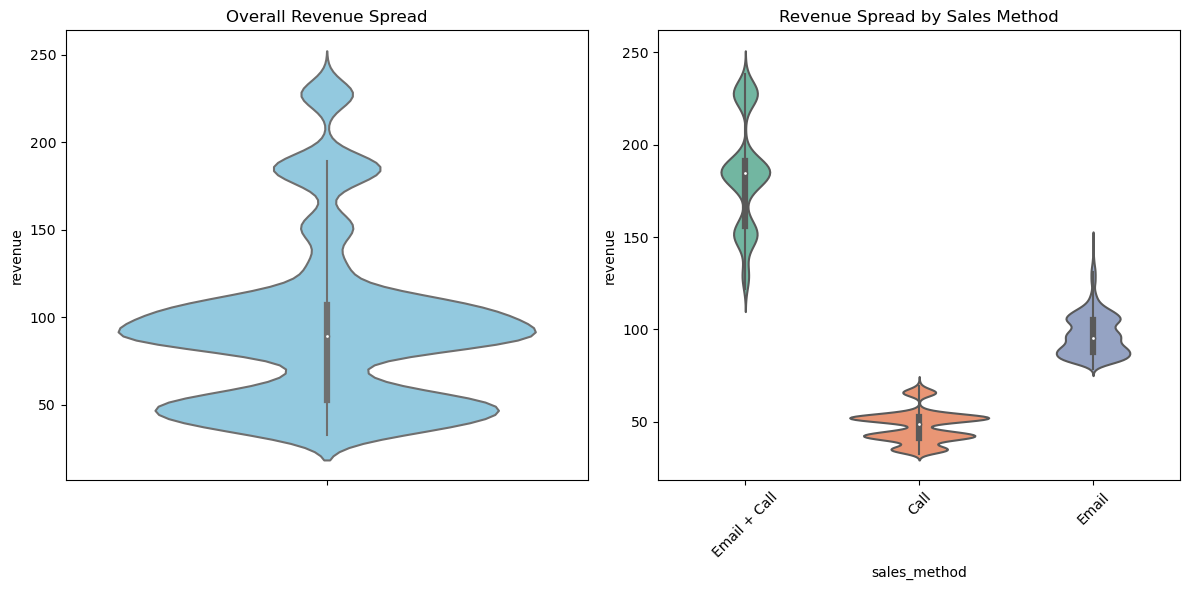

In [80]:
plt.figure(figsize=(12, 6))

# Overall revenue spread
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='revenue', color='skyblue')
plt.title('Overall Revenue Spread')
plt.savefig('Overall Revenue Spread')

# Revenue spread for each sales method
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='sales_method', y='revenue', palette='Set2')
plt.title('Revenue Spread by Sales Method')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.savefig('Revenue Spread by Sales Method (Violin Plot)')
plt.show()

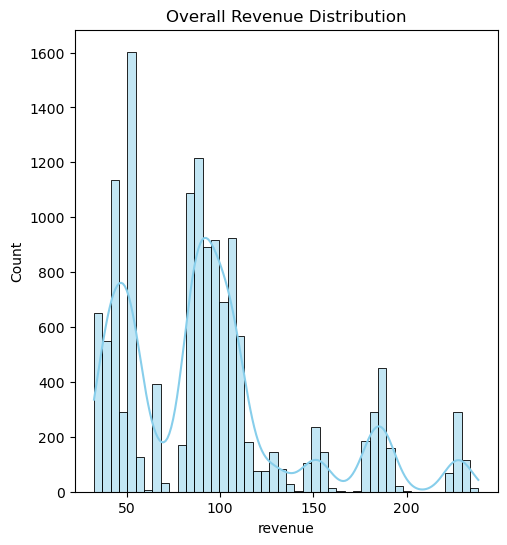

In [81]:
plt.figure(figsize=(12, 6))

# Overall revenue spread
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revenue', color='skyblue', kde=True)
plt.title('Overall Revenue Distribution')
plt.savefig('Overall Revenue Distribution')

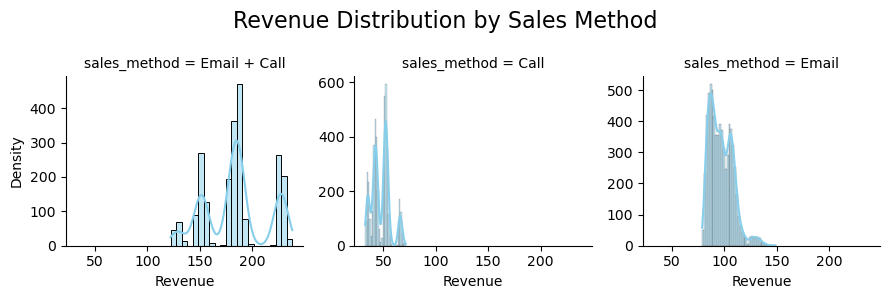

In [82]:
# Revenue spread for each sales method
#plt.subplot(1, 2, 2)
g = sns.FacetGrid(data=df, col='sales_method', margin_titles=True, sharey=False)
g.map_dataframe(sns.histplot, x='revenue', kde=True, color='skyblue')
g.set_axis_labels('Revenue', 'Density')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Revenue Distribution by Sales Method', fontsize=16)
plt.tight_layout()
plt.savefig('Revenue Distribution by Sales Method')
plt.show()

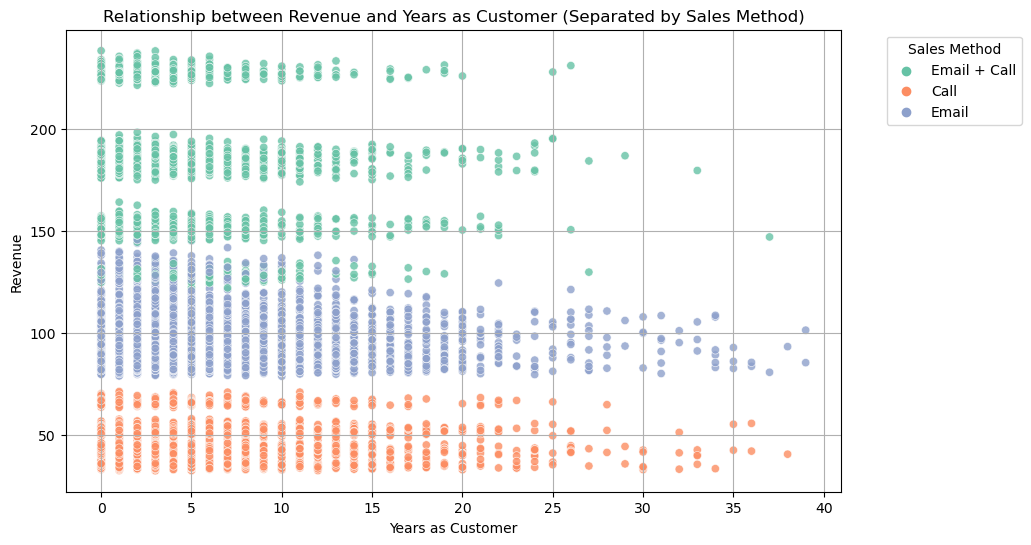

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='years_as_customer', y='revenue', hue='sales_method', palette='Set2', alpha=0.8)
plt.title('Relationship between Revenue and Years as Customer (Separated by Sales Method)')
plt.xlabel('Years as Customer')
plt.ylabel('Revenue')
plt.legend(title='Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.savefig('Relationship between Revenue and Years as Customer')
plt.show()

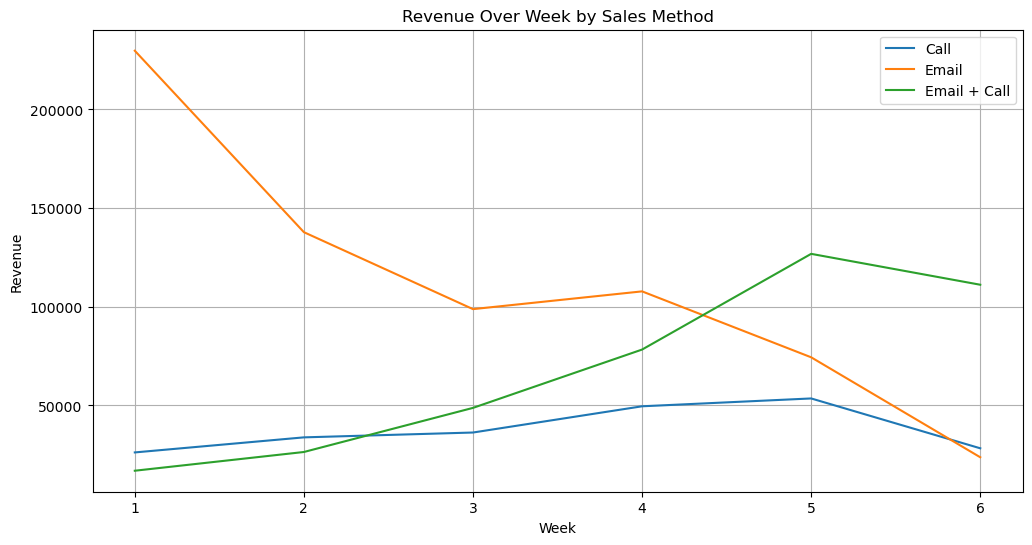

In [84]:
revenue_by_sales_method = df.groupby(['sales_method', 'week'])['revenue'].sum().unstack().T

# Plot the data for each sales method
plt.figure(figsize=(12, 6))

for sales_method in revenue_by_sales_method.columns:
    plt.plot(revenue_by_sales_method.index, revenue_by_sales_method[sales_method], label=sales_method)

# Customize the plot
plt.title('Revenue Over Week by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.savefig('Revenue Over Week by Sales Method')
# Show the plot
plt.show()

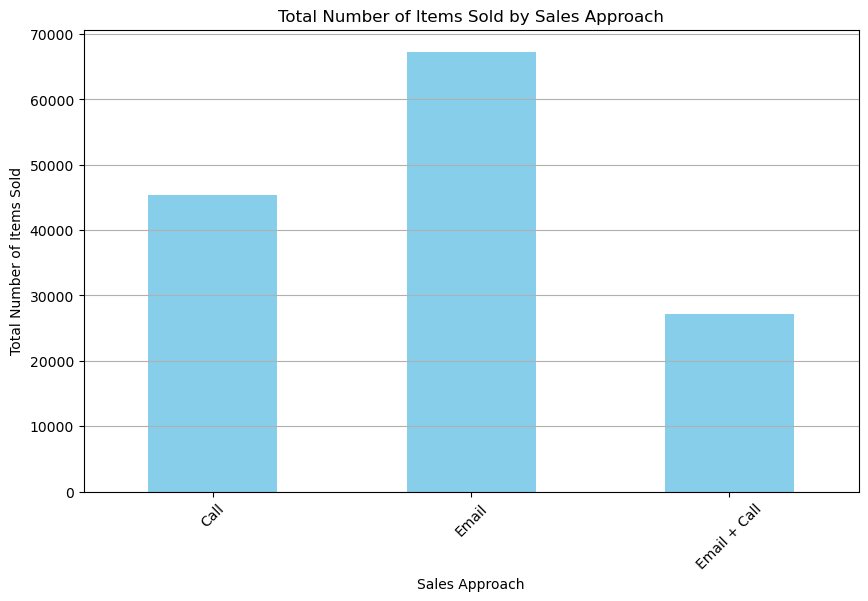

In [98]:
plt.figure(figsize=(10, 6))
df.groupby('sales_method')['nb_sold'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Number of Items Sold by Sales Approach')
plt.xlabel('Sales Approach')
plt.ylabel('Total Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Total Number of Items Sold by Sales Approach')
plt.show()

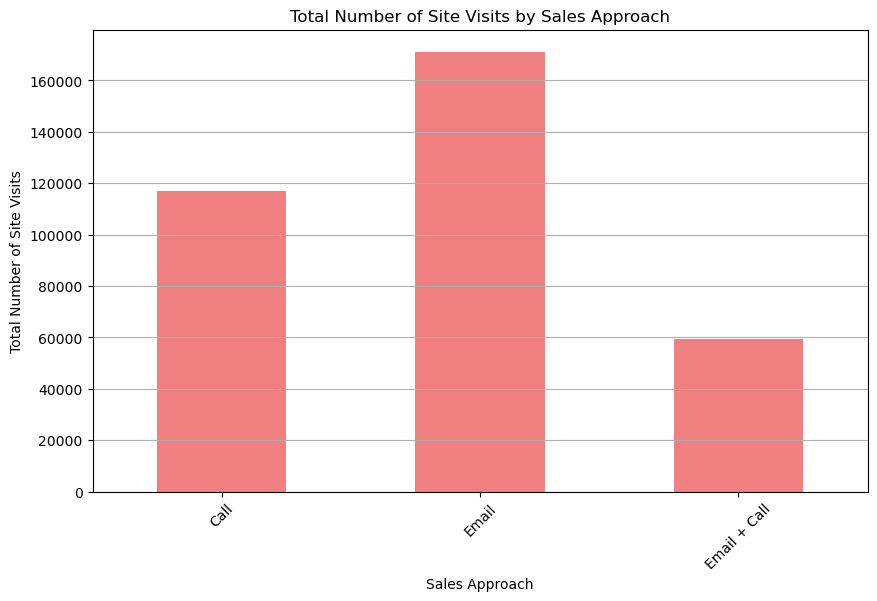

In [97]:
plt.figure(figsize=(10, 6))
df.groupby('sales_method')['nb_site_visits'].sum().plot(kind='bar', color='lightcoral')
plt.title('Total Number of Site Visits by Sales Approach')
plt.xlabel('Sales Approach')
plt.ylabel('Total Number of Site Visits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('Total Number of Site Visits by Sales Approach')
plt.show()

<Figure size 1200x600 with 0 Axes>

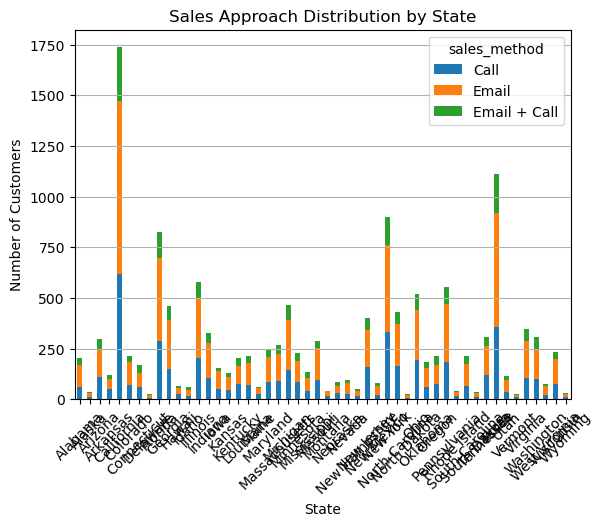

In [91]:
sales_method_by_state = df.groupby(['state', 'sales_method'])['customer_id'].count().unstack()

plt.figure(figsize=(12, 6))
sales_method_by_state.plot(kind='bar', stacked=True)
plt.title('Sales Approach Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()